In [2]:
from requests import post
from app.analysis import Quote
query = 'query UnknownFile($limit_0:[FundLimitOptionInput!]!) {viewer {...Fe}} fragment Fe on Viewer {_screenFunds4s9d1a:screenFunds(filterCategory:["$$"],limit:$limit_0,first:100) {edges {node {symbol}}}}'
variables = {'limit_0':[{'type':'FUND_TOTAL_ASSETS','min':1000000000,'inclusive':True}]}
r = post('https://lens.m1finance.com/graphql', json={'query': query.replace('$$', 'Equities","Foreign'), 'variables': variables}).json()
symbols = [n['node']['symbol'] for n in r['data']['viewer']['_screenFunds4s9d1a']['edges']]
symbols += ['VT']

In [3]:
quote = Quote(symbols, 70, 20)
f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}'

'from 2019-04-25 to 2019-07-03 - 76'

In [5]:
quote.drop_mask()
stat = quote.statistics()
stat = stat[(stat['drawdown'] < 8) & (stat['shrp'] > 0.4)]
stat

,len,mean,std,shrp,drawdown
Symbols,,,,,
RSX,29,6.402178,3.643633,1.713523,4.174395
EWL,29,3.775342,2.320469,1.558569,3.113807
EWA,29,3.120687,2.023173,1.464016,3.100777
EFAV,29,2.133655,1.910713,1.033607,2.819624
VIGI,29,2.273410,3.220449,0.656641,4.587566
FNDE,29,2.478709,4.745456,0.488884,7.045220
EFG,29,1.744543,3.442884,0.460606,4.537548
EPP,29,1.765376,3.548809,0.452728,4.599415
DEM,29,2.016418,4.570851,0.406421,6.447277


Populating the interactive namespace from numpy and matplotlib
evicted CWI 0.9962177471235963
evicted SCHF 0.9998259640089087
evicted VEA 0.9996732444683101
evicted IEV 0.9996711743870936
evicted EFA 0.9992226815812878
evicted VGK 0.998060511327045
evicted GSIE 0.9983659413817967
evicted IDEV 0.9985361863044123
evicted SPDW 0.997342574134036
evicted FEZ 0.993223333784596
evicted RODM 0.9907333969695665
evicted PXH 0.9986626738200814
evicted IPAC 0.9896079857241044
evicted EEMV 0.9964805971855114
evicted EFAV 0.977175690217915
evicted FNDE 0.9928447650383988
evicted DEM 0.9752605688390462
evicted VIGI 0.9856072781575201
evicted EFG 0.9857108309435014
evicted EPP 0.979889920999083
evicted EWC 0.8709395776399985
evicted EWL 0.9284246444922702
evicted EWA 0.8546869841628884
{'RSX': 1.0}


,count,mean,std,min,25%,50%,75%,max,shrp,drawdown
RSX,29.0,6.402178,3.643633,-0.696386,3.037381,7.845812,9.613616,10.560749,1.713523,4.174395
Portfolio,29.0,6.402178,3.643633,-0.696386,3.037381,7.845812,9.613616,10.560749,1.713523,4.174395


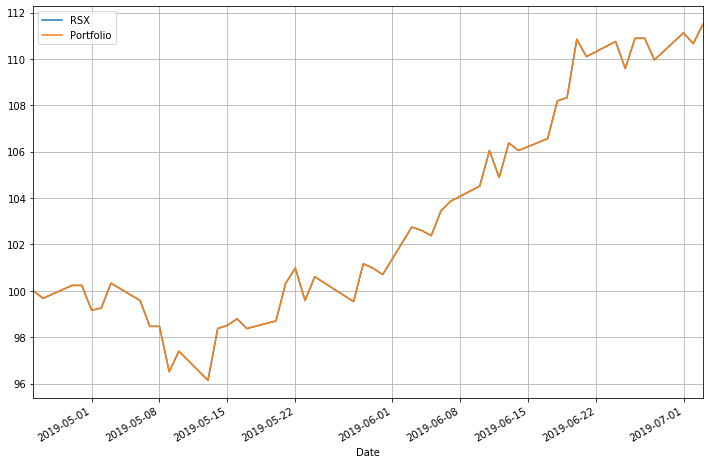

In [11]:
%pylab inline
quote.drop_mask()
ratio = quote.optimize_portfolio(stat.index)
print(ratio)
quote.setup_mask(ratio)
quote.graph(ratio)